In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns
import array as arr
import neurokit2 as nk

In [40]:
data = pd.read_csv(r"C:\Users\fffmm\Desktop\SCTIMST\LAB_Internship\EEG\data\Data1.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16384 non-null  int64  
 1   trial number        16384 non-null  int64  
 2   sensor position     16384 non-null  object 
 3   sample num          16384 non-null  int64  
 4   sensor value        16384 non-null  float64
 5   subject identifier  16384 non-null  object 
 6   matching condition  16384 non-null  object 
 7   channel             16384 non-null  int64  
 8   name                16384 non-null  object 
 9   time                16384 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.3+ MB
None


In [41]:
data

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625
...,...,...,...,...,...,...,...,...,...,...
16379,16447,0,Y,251,6.571,a,S1 obj,63,co2a0000364,0.980469
16380,16448,0,Y,252,12.431,a,S1 obj,63,co2a0000364,0.984375
16381,16449,0,Y,253,15.849,a,S1 obj,63,co2a0000364,0.988281
16382,16450,0,Y,254,16.337,a,S1 obj,63,co2a0000364,0.992188


In [42]:
data1=data[['time','sensor value']]

In [43]:
data1

,time,sensor value
0,0.000000,-8.921
1,0.003906,-8.433
2,0.007812,-2.574
3,0.011719,5.239
4,0.015625,11.587
...,...,...
16379,0.980469,6.571
16380,0.984375,12.431
16381,0.988281,15.849
16382,0.992188,16.337


In [44]:
data2=data1.head(2000)

In [45]:
f_sample=len(data['sensor value'])/100
# sampling frq or sampling rate

<AxesSubplot:>

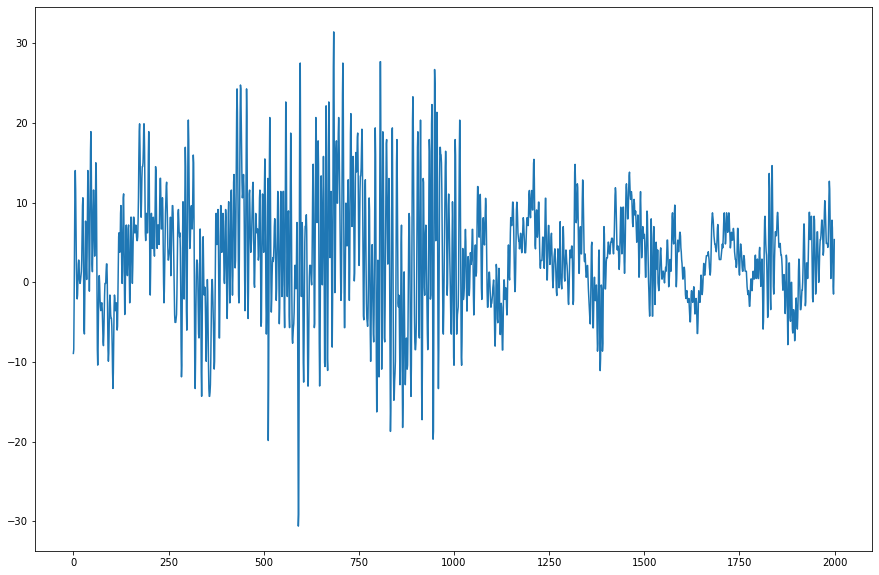

In [46]:
data2['sensor value'].plot(figsize=(15,10))

In [47]:
# pass band frequency 
f_pass =[10,37] 

# stop band frequency 
f_stop =[8,39] 

In [48]:
# pass band ripple 
fs = 0.5
    
# Sampling Time 
Td = 1  
    
 # pass band ripple 
g_pass = 0.4 

# stop band attenuation 
g_stop = 50 

In [49]:
# User-defined function to convert the 
# values of edge frequencies
def convertX(f_sample,f):
    w=[]
    for i in range(len(f)):
        b=2*((f[i]/2)/(f_sample/2))
        w.append(b)
    omega_mine=[]
    for i in range(len(w)):
        c=(2/Td)*np.tan(w[i]/2)
        omega_mine.append(c)
    return omega_mine
  

In [50]:
# Conversion to prewrapped analog
# frequency 
omega_p=convertX(f_sample,f_pass)
omega_s=convertX(f_sample,f_stop)

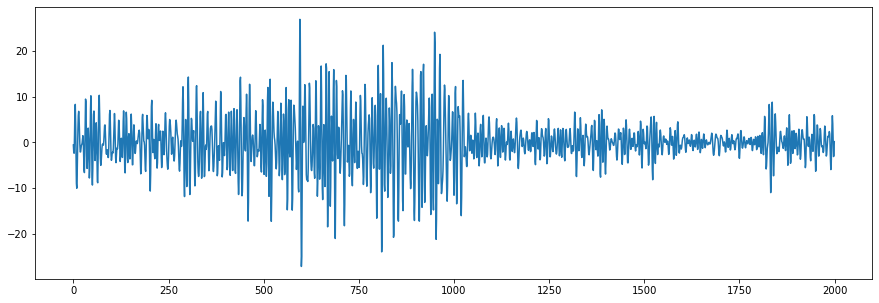

In [51]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = f_sample
    lowcut = 10.0
    highcut = 37.0

    t= data2['time']
    x= data2['sensor value']

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=3)
    plt.plot(y, label='Filtered signal (%g Hz)' )

    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (15,10)
    plt.show()


run()


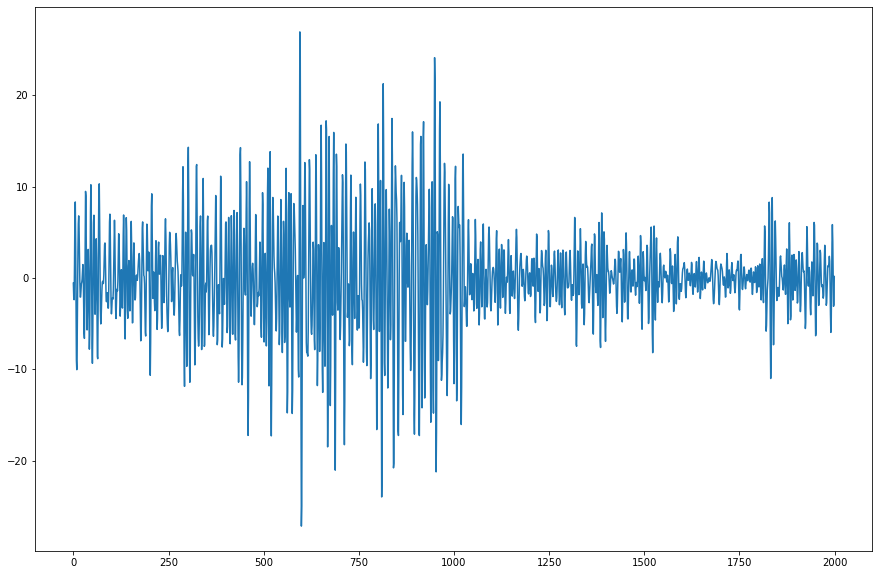

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = f_sample
lowcut = 10.0
highcut = 37.0

t= data2['time']
x= data2['sensor value']

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=3)
plt.plot(y, label='Filtered signal (%g Hz)' )

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.show()


<AxesSubplot:>

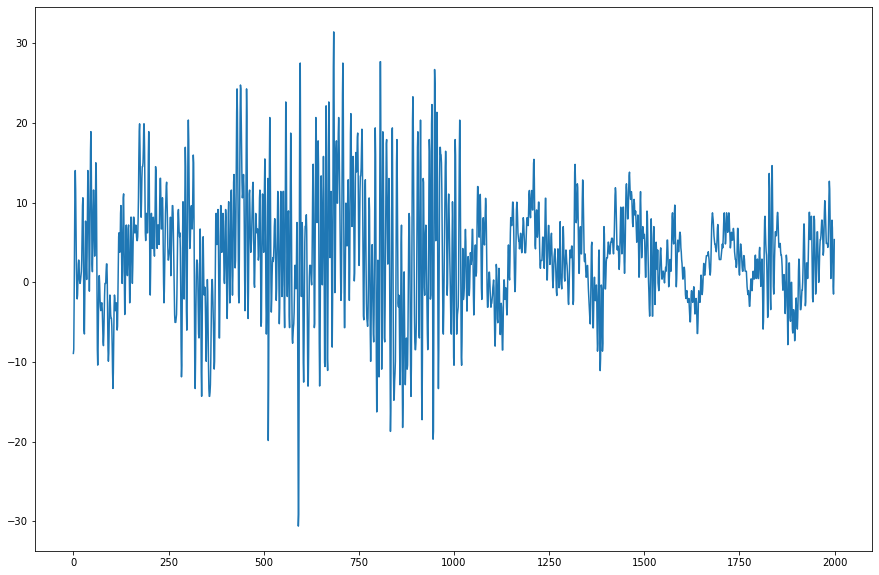

In [53]:
data2['sensor value'].plot(figsize=(15,10))

In [54]:
data4 = pd.read_csv(r"C:\Users\fffmm\Desktop\SCTIMST\LAB_Internship\EEG\data_micro.csv")

In [55]:
data4.head(10)

,Unnamed: 0,sensor value
0,0,3.947
1,1,4.924
2,2,4.924
3,3,4.435
4,4,3.947
5,5,3.459
6,6,2.970
7,7,1.994
8,8,1.017
9,9,-0.448


In [56]:
data2.head(10)

,time,sensor value
0,0.000000,-8.921
1,0.003906,-8.433
2,0.007812,-2.574
3,0.011719,5.239
4,0.015625,11.587
5,0.019531,14.028
6,0.023438,11.587
7,0.027344,6.704
8,0.031250,1.821
9,0.035156,-1.109


In [98]:
ser1 = pd.Series(k)

In [58]:
ser2 = pd.Series(data2['time'])

In [59]:
data2.index

RangeIndex(start=0, stop=2000, step=1)

In [99]:
arr1=ser1.to_numpy(dtype ='float32')

In [61]:
arr2=ser2.to_numpy(dtype='float32')

In [87]:
arr1

array([-0.06629854, -0.36800927, -0.6789187 , ..., -6.0007625 ,
       -5.3868384 , -1.4693946 ], dtype=float32)

In [63]:
ser1

0       3.947
1       4.924
2       4.924
3       4.435
4       3.947
        ...  
1995   -5.188
1996   -4.211
1997   -3.235
1998   -3.235
1999   -3.235
Name: sensor value, Length: 2000, dtype: float64

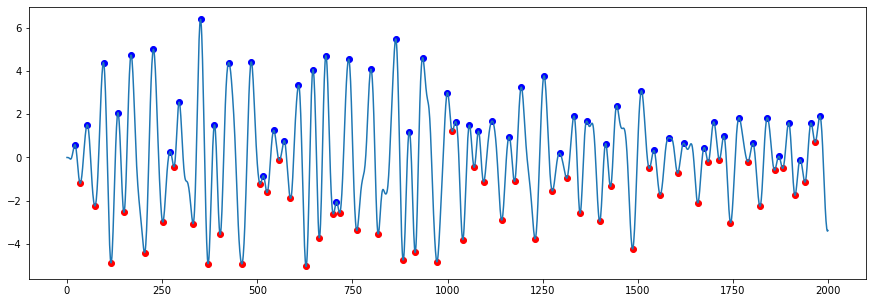

In [100]:

import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array

def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)
    return array(x)

if __name__=="__main__":
    from matplotlib.pyplot import plot, scatter, show
    series = arr1
    maxtab, mintab = peakdet(series,.3)
    plot(series)
    scatter(array(maxtab)[:,0], array(maxtab)[:,1], color='blue')
    scatter(array(mintab)[:,0], array(mintab)[:,1], color='red')
    show()

In [65]:
maxtab

array([[ 1.00000000e+00,  4.92399979e+00],
       [ 2.40000000e+01,  1.07830000e+01],
       [ 3.00000000e+01,  2.97000003e+00],
       [ 4.70000000e+01,  1.56660004e+01],
       [ 6.80000000e+01,  5.41200018e+00],
       [ 7.40000000e+01,  1.07830000e+01],
       [ 8.80000000e+01, -1.02130003e+01],
       [ 9.50000000e+01, -2.88899994e+00],
       [ 1.02000000e+02, -9.35999990e-01],
       [ 1.15000000e+02, -2.40100002e+00],
       [ 1.29000000e+02, -2.40100002e+00],
       [ 1.40000000e+02, -2.88899994e+00],
       [ 1.53000000e+02, -7.28399992e+00],
       [ 1.60000000e+02, -4.35400009e+00],
       [ 1.66000000e+02, -1.91199994e+00],
       [ 1.79000000e+02, -7.28399992e+00],
       [ 1.86000000e+02, -4.48000014e-01],
       [ 1.93000000e+02, -1.42400002e+00],
       [ 2.03000000e+02, -7.28399992e+00],
       [ 2.12000000e+02, -1.42400002e+00],
       [ 2.18000000e+02,  7.85300016e+00],
       [ 2.27000000e+02, -4.48000014e-01],
       [ 2.41000000e+02,  4.10000011e-02],
       [ 2.

In [66]:
maxtab[5,0]

74.0

In [67]:
# we need only the max valued peak points
# if the value of the peak is more than 5, then start a square wave at that moment for next 5 mili secs


In [105]:
p=np.zeros(2000)
for i in range(len(maxtab)):
    if (maxtab[i,1])>0:
        p[int(maxtab[i,0])]=1
        p[int(maxtab[i,0])+1]=1
        p[int(maxtab[i,0])+2]=1
        p[int(maxtab[i,0])+3]=1
        p[int(maxtab[i,0])+4]=1    # just to make square waves n data point thick

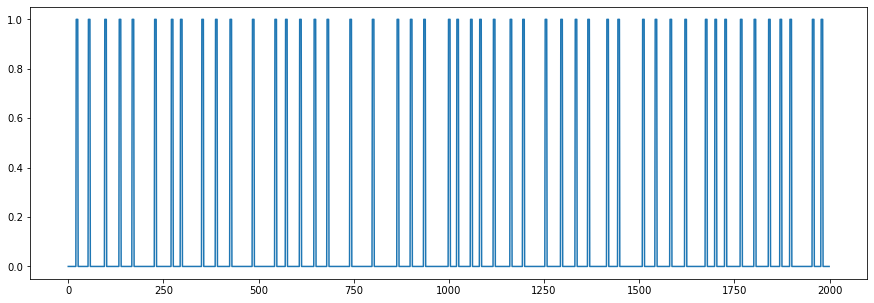

In [106]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(p)

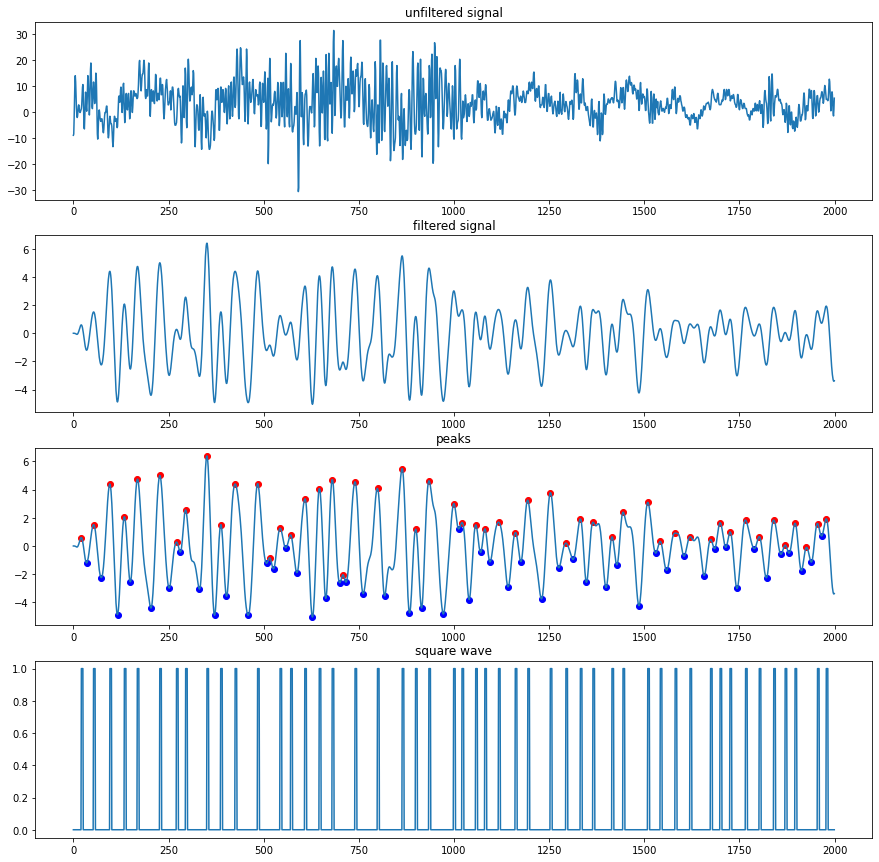

In [115]:
plt_1 = plt.figure(figsize=(15, 15))
plt.figure(1)
plt.subplot(411)
plt.title('unfiltered signal')
plt.plot(data2['sensor value'])
plt.subplot(412)
plt.title('filtered signal')
plt.plot(k)
plt.subplot(413)
plt.title('peaks')
plot(series)
scatter(array(maxtab)[:,0], array(maxtab)[:,1], color='red')
scatter(array(mintab)[:,0], array(mintab)[:,1], color='blue')
plt.subplot(414)
plt.title('square wave')
plt.plot(p)

In [70]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

In [93]:
k=butter_bandpass_filter(data2['sensor value'],12,37,1000)

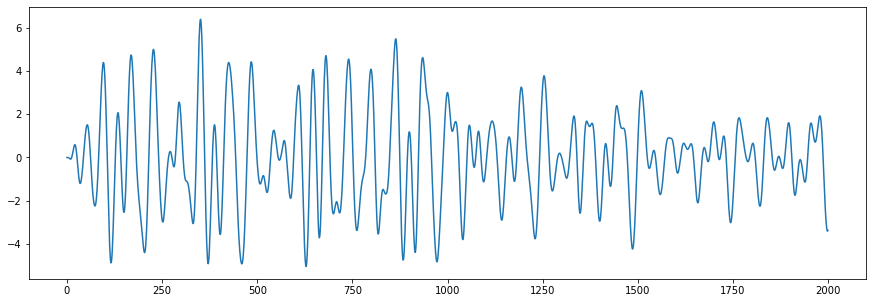

In [94]:
plt.plot(k)

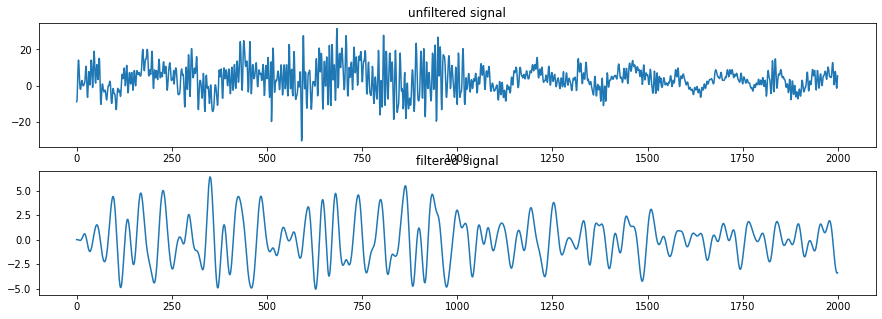

In [95]:
plt.figure(1)
plt.subplot(211)
plt.title('unfiltered signal')
plt.plot(data2['sensor value'])
plt.subplot(212)
plt.title('filtered signal')
plt.plot(k)

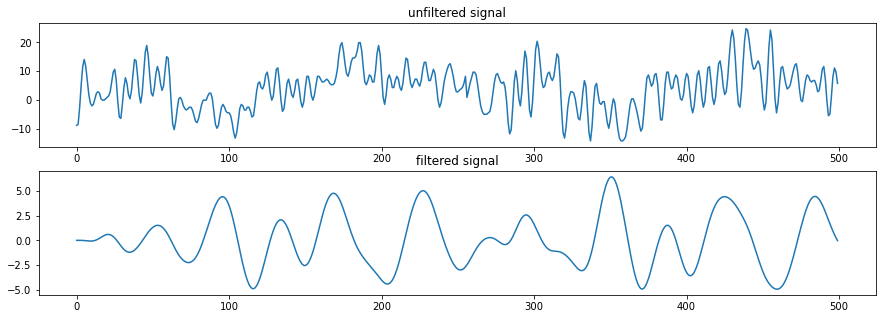

In [96]:
plt.figure(1)
plt.subplot(211)
plt.title('unfiltered signal')
plt.plot(data2['sensor value'][0:500])
plt.subplot(212)
plt.title('filtered signal')
plt.plot(k[0:500])

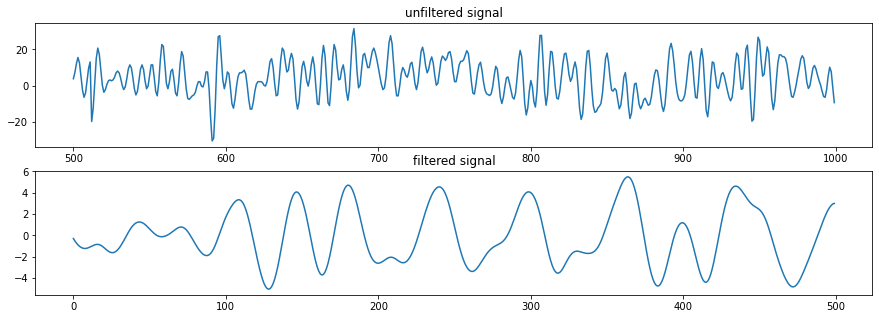

In [97]:
plt.figure(1)
plt.subplot(211)
plt.title('unfiltered signal')
plt.plot(data2['sensor value'][500:1000])
plt.subplot(212)
plt.title('filtered signal')
plt.plot(k[500:1000])

In [84]:
k

array([-0.06629854, -0.36800928, -0.67891874, ..., -6.00076224,
       -5.38683846, -1.46939452])

In [73]:
x

0       -8.921
1       -8.433
2       -2.574
3        5.239
4       11.587
         ...  
1995     3.408
1996    -0.498
1997    -1.475
1998     0.966
1999     5.361
Name: sensor value, Length: 2000, dtype: float64

In [74]:
len(x)

2000

In [75]:
DURATION=1
SAMPLE_RATE = f_sample

In [76]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft((data2['sensor value']).values)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

ValueError: n should be an integer

In [ ]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft((data2['sensor value']).values)
#xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(np.abs(yf))
plt.show()